[0.00000000e+00 5.00000208e-07 1.00000133e-06 ... 5.01367543e-03
 5.01418290e-03 5.01469038e-03]
[0.00000000e+00 5.00000292e-07 1.00000167e-06 ... 3.23031043e-04
 3.23740469e-04 3.24450813e-04]
[0.00000000e+00 5.00029168e-05 1.00016669e-04 ... 3.12760929e-03
 3.19789021e-03 3.26906920e-03]


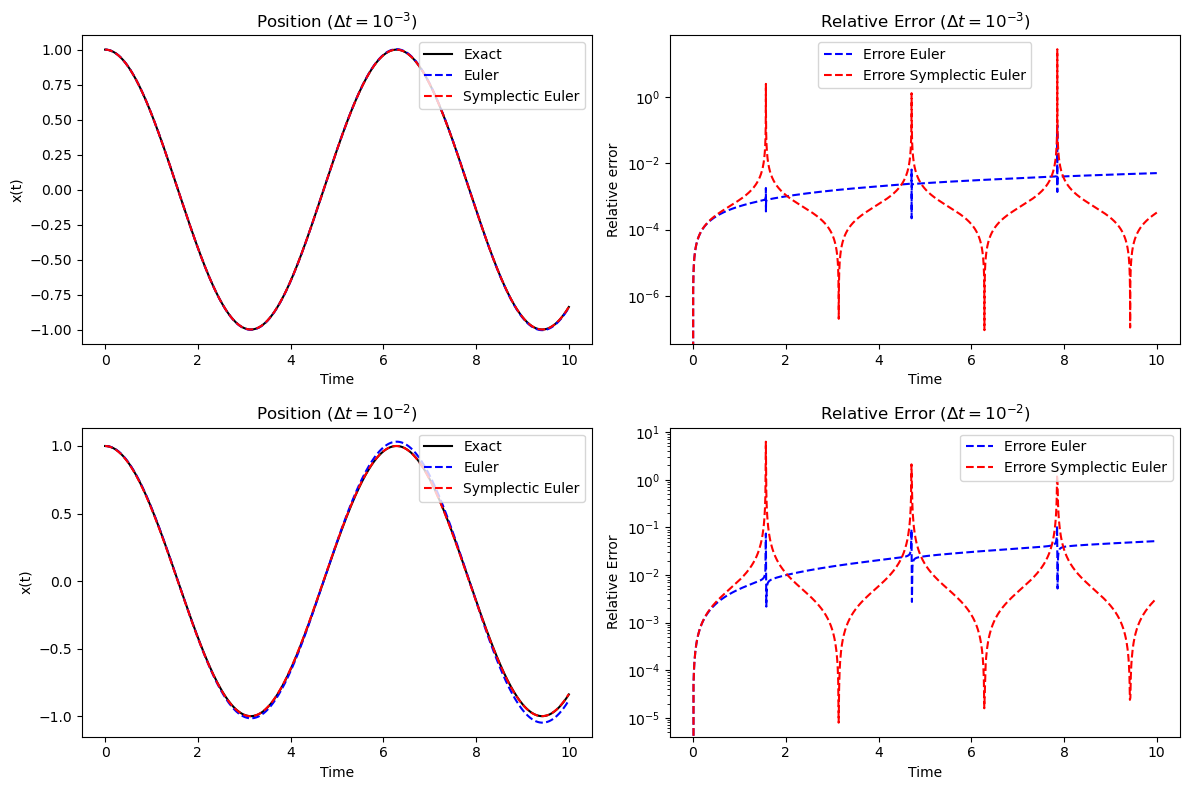

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Definizione dei parametri
delta_t1 = 1e-3
delta_t2 = 1e-2
T = 10  # Tempo totale
n_steps1 = int(T / delta_t1)
n_steps2 = int(T / delta_t2)

# Condizioni iniziali
x0 = 1.0
p0 = 0.0

def exact_solution(t):
    """Soluzione esatta per x(t) e p(t)"""
    x_exact = np.cos(t)
    p_exact = -np.sin(t)
    return x_exact, p_exact

def euler_integrator(delta_t, n_steps):
    """Metodo di integrazione di Euler standard"""
    x = np.zeros(n_steps + 1)
    p = np.zeros(n_steps + 1)
    t = np.linspace(0, T, n_steps + 1)

    x[0] = x0
    p[0] = p0

    for i in range(n_steps):
        p[i + 1] = p[i] - x[i] * delta_t
        x[i + 1] = x[i] + p[i] * delta_t

    return x, p, t

def symplectic_euler_integrator(delta_t, n_steps):
    """Metodo di integrazione simplettico di Euler"""
    x = np.zeros(n_steps + 1)
    p = np.zeros(n_steps + 1)
    t = np.linspace(0, T, n_steps + 1)

    x[0] = x0
    p[0] = p0

    for i in range(n_steps):
        p[i + 1] = p[i] - x[i] * delta_t
        x[i + 1] = x[i] + p[i + 1] * delta_t

    return x, p, t

# Integrazione numerica
x_euler1, p_euler1, t1 = euler_integrator(delta_t1, n_steps1)
x_symplectic1, p_symplectic1, t1 = symplectic_euler_integrator(delta_t1, n_steps1)

x_euler2, p_euler2, t2 = euler_integrator(delta_t2, n_steps2)
x_symplectic2, p_symplectic2, t2 = symplectic_euler_integrator(delta_t2, n_steps2)

# Soluzione esatta
x_exact1, p_exact1 = exact_solution(t1)
x_exact2, p_exact2 = exact_solution(t2)

# Calcolo dell'errore relativo
error_euler1 = np.abs((x_euler1 - x_exact1) / x_exact1)
error_symplectic1 = np.abs((x_symplectic1 - x_exact1) / x_exact1)
print(error_euler1)
print(error_symplectic1)
error_euler2 = np.abs((x_euler2 - x_exact2) / x_exact2)
error_symplectic2 = np.abs((x_symplectic2 - x_exact2) / x_exact2)
print(error_symplectic2)
# Plot dei risultati
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(t1, x_exact1, 'k-', label='Exact')
plt.plot(t1, x_euler1, 'b--', label='Euler')
plt.plot(t1, x_symplectic1, 'r--', label='Symplectic Euler')
plt.title('Position ($\Delta t = 10^{-3}$)')
plt.xlabel('Time')
plt.ylabel('x(t)')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(t1, error_euler1, 'b--', label='Errore Euler')
plt.plot(t1, error_symplectic1, 'r--', label='Errore Symplectic Euler')
plt.title('Relative Error ($\Delta t = 10^{-3}$)')
plt.xlabel('Time')
plt.ylabel('Relative error')
plt.legend()
plt.yscale('log')

plt.subplot(2, 2, 3)
plt.plot(t2, x_exact2, 'k-', label='Exact')
plt.plot(t2, x_euler2, 'b--', label='Euler')
plt.plot(t2, x_symplectic2, 'r--', label='Symplectic Euler')
plt.title('Position ($\Delta t = 10^{-2}$)')
plt.xlabel('Time')
plt.ylabel('x(t)')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(t2, error_euler2, 'b--', label='Errore Euler')
plt.plot(t2, error_symplectic2, 'r--', label='Errore Symplectic Euler')
plt.title('Relative Error ($\Delta t = 10^{-2}$)')
plt.xlabel('Time')
plt.ylabel('Relative Error')
plt.legend()
plt.yscale('log')
plt.tight_layout()
plt.show()


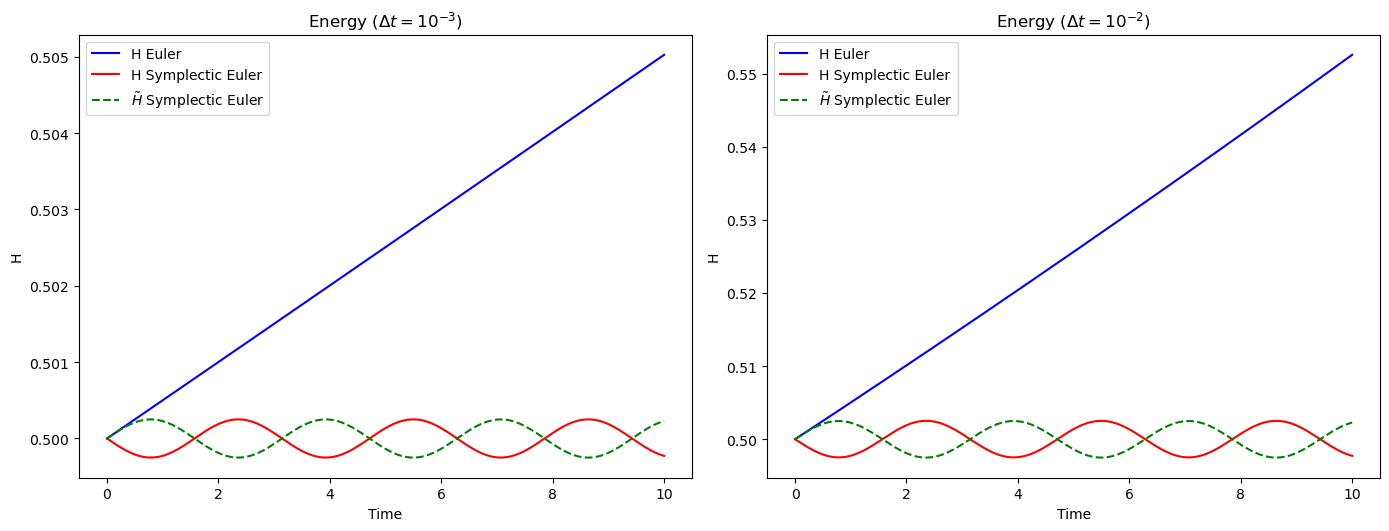

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parametri
dt1 = 1e-3
dt2 = 1e-2
T = 10
n_steps1 = int(T / dt1)
n_steps2 = int(T / dt2)
t1 = np.linspace(0, T, n_steps1 + 1)
t2 = np.linspace(0, T, n_steps2 + 1)

# Condizioni iniziali
x0 = 1.0
p0 = 0.0

# Funzioni per calcolare l'energia Hamiltoniana H e la shadow Hamiltonian H_tilde
def compute_H(x, p):
    return 0.5 * p**2 + 0.5 * x**2

def compute_H_tilde(x, p, dt):
    return 0.5 * p**2 + 0.5 * x**2 - p * x * dt

# Inizializzazione degli array per memorizzare i risultati
x_euler1, p_euler1 = np.zeros(n_steps1 + 1), np.zeros(n_steps1 + 1)
x_symplectic1, p_symplectic1 = np.zeros(n_steps1 + 1), np.zeros(n_steps1 + 1)
H_euler1, H_symplectic1, H_tilde1 = np.zeros(n_steps1 + 1), np.zeros(n_steps1 + 1), np.zeros(n_steps1 + 1)

x_euler2, p_euler2 = np.zeros(n_steps2 + 1), np.zeros(n_steps2 + 1)
x_symplectic2, p_symplectic2 = np.zeros(n_steps2 + 1), np.zeros(n_steps2 + 1)
H_euler2, H_symplectic2, H_tilde2 = np.zeros(n_steps2 + 1), np.zeros(n_steps2 + 1), np.zeros(n_steps2 + 1)

# Condizioni iniziali
x_euler1[0], p_euler1[0] = x0, p0
x_symplectic1[0], p_symplectic1[0] = x0, p0
H_euler1[0] = compute_H(x0, p0)
H_symplectic1[0] = compute_H(x0, p0)
H_tilde1[0] = compute_H_tilde(x0, p0, dt1)

x_euler2[0], p_euler2[0] = x0, p0
x_symplectic2[0], p_symplectic2[0] = x0, p0
H_euler2[0] = compute_H(x0, p0)
H_symplectic2[0] = compute_H(x0, p0)
H_tilde2[0] = compute_H_tilde(x0, p0, dt2)

# Integrazione con metodo di Eulero e Eulero simpatico per dt1
for i in range(n_steps1):
    # Eulero classico
    p_euler1[i + 1] = p_euler1[i] - x_euler1[i] * dt1
    x_euler1[i + 1] = x_euler1[i] + p_euler1[i] * dt1
    H_euler1[i + 1] = compute_H(x_euler1[i + 1], p_euler1[i + 1])

    # Eulero simpatico
    p_symplectic1[i + 1] = p_symplectic1[i] - x_symplectic1[i] * dt1
    x_symplectic1[i + 1] = x_symplectic1[i] + p_symplectic1[i + 1] * dt1
    H_symplectic1[i + 1] = compute_H(x_symplectic1[i + 1], p_symplectic1[i + 1])
    H_tilde1[i + 1] = compute_H_tilde(x_symplectic1[i + 1], p_symplectic1[i + 1], dt1)

# Integrazione con metodo di Eulero e Eulero simpatico per dt2
for i in range(n_steps2):
    # Eulero classico
    p_euler2[i + 1] = p_euler2[i] - x_euler2[i] * dt2
    x_euler2[i + 1] = x_euler2[i] + p_euler2[i] * dt2
    H_euler2[i + 1] = compute_H(x_euler2[i + 1], p_euler2[i + 1])

    # Eulero simpatico
    p_symplectic2[i + 1] = p_symplectic2[i] - x_symplectic2[i] * dt2
    x_symplectic2[i + 1] = x_symplectic2[i] + p_symplectic2[i + 1] * dt2
    H_symplectic2[i + 1] = compute_H(x_symplectic2[i + 1], p_symplectic2[i + 1])
    H_tilde2[i + 1] = compute_H_tilde(x_symplectic2[i + 1], p_symplectic2[i + 1], dt2)

# Plotting H and H_tilde
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
plt.plot(t1, H_euler1, 'b', label='H Euler')
plt.plot(t1, H_symplectic1, 'r', label='H Symplectic Euler')
plt.plot(t1, H_tilde1, 'g--', label='$\~H$ Symplectic Euler')
plt.title('Energy ($\Delta t = 10^{-3}$)')
plt.xlabel('Time')
plt.ylabel('H')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(t2, H_euler2, 'b', label='H Euler')
plt.plot(t2, H_symplectic2, 'r', label='H Symplectic Euler')
plt.plot(t2, H_tilde2, 'g--', label='$\~H$ Symplectic Euler')
plt.title('Energy ($\Delta t = 10^{-2}$)')
plt.xlabel('Time')
plt.ylabel('H')
plt.legend()

plt.tight_layout()
plt.show()


Il grafico che hai generato mostra un comportamento corretto in generale, ma è utile analizzare meglio i risultati per capire meglio il significato e la validità del grafico. Ecco alcune osservazioni:

Deriva dell'energia 
H
H:
La curva blu rappresenta l'energia 
H
H per l'integratore di Eulero classico. Come atteso, mostra una deriva lineare verso l'alto, il che è sintomatico del fatto che l'integratore di Eulero non è energicamente conservativo. La deriva è più pronunciata per un passo temporale maggiore (
Δ
t
=
1
0
−
2
Δt=10 
−2
 ), come mostrato nel secondo pannello.
Energia 
H
H per l'integratore di Eulero simpatico:
La curva rossa rappresenta l'energia 
H
H per l'integratore di Eulero simpatico. Questa curva oscilla intorno a un valore medio, indicando che, sebbene non conservi perfettamente 
H
H, non presenta una deriva a lungo termine. Questo è un comportamento tipico degli integratori simpatici, che preservano qualitativamente l'energia a lungo termine.
Shadow Hamiltonian 
H
~
H
~
 :
La curva verde tratteggiata rappresenta la "shadow Hamiltonian" 
H
~
H
~
 . Questo valore oscilla con una frequenza e un'ampiezza simili a 
H
H calcolato per l'integratore simpatico. Questa Hamiltoniana rappresenta una conservazione approssimata dell'energia, che è esattamente il motivo per cui gli integratori simpatici non soffrono di deriva a lungo termine.
Stranezza del grafico:
Se il grafico ti sembra "strano", potrebbe essere dovuto a una delle seguenti ragioni:
Scala: La scala dell'asse 
y
y potrebbe rendere difficile apprezzare le differenze tra le curve. Potresti voler ingrandire una parte specifica del grafico per vedere meglio le differenze.
Passo temporale: Il passo temporale 
Δ
t
Δt potrebbe essere troppo grande, soprattutto per l'integratore di Eulero classico. Ridurre ulteriormente 
Δ
t
Δt potrebbe dare risultati più accurati.


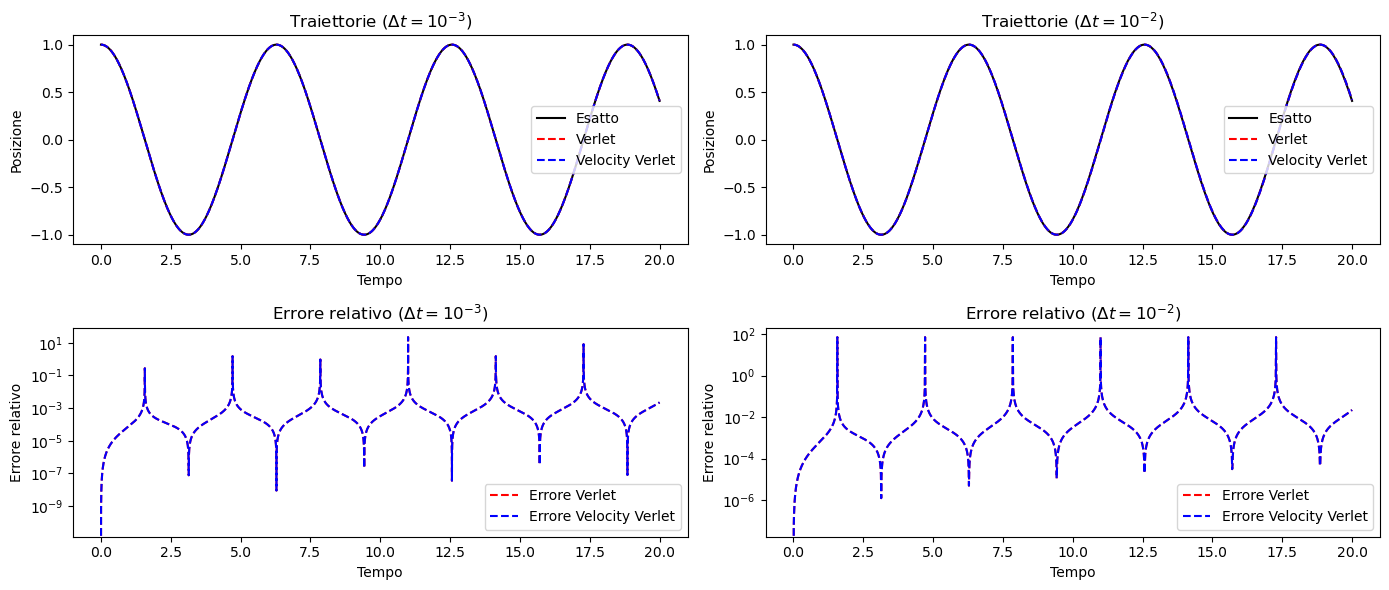

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
k = 1.0  # Spring constant
m = 1.0  # Mass
dt1 = 1e-3
dt2 = 1e-2
T = 20
n_steps1 = int(T / dt1)
n_steps2 = int(T / dt2)

# Exact solution for comparison
def exact_solution(t):
    return np.cos(np.sqrt(k/m) * t)

# Velocity Verlet Algorithm
def velocity_verlet(x0, v0, dt, n_steps):
    x = np.zeros(n_steps)
    v = np.zeros(n_steps)
    a = np.zeros(n_steps)
    
    x[0] = x0
    v[0] = v0
    a[0] = -k/m * x0
    
    for i in range(n_steps - 1):
        x[i+1] = x[i] + v[i] * dt + 0.5 * a[i] * dt**2
        a_next = -k/m * x[i+1]
        v[i+1] = v[i] + 0.5 * (a[i] + a_next) * dt
        a[i+1] = a_next
    
    return x, v

# Verlet Algorithm
def verlet(x0, v0, dt, n_steps):
    x = np.zeros(n_steps)
    v = np.zeros(n_steps)  # Initialize with the same size, we'll update it later
    
    x[0] = x0
    x[1] = x0 + v0 * dt - 0.5 * k/m * x0 * dt**2  # Use initial velocity to compute x[1]
    
    for i in range(1, n_steps - 1):
        x[i+1] = 2 * x[i] - x[i-1] - k/m * x[i] * dt**2
    
    # Velocity can only be computed from the second to the second-to-last point
    v[1:-1] = (x[2:] - x[:-2]) / (2 * dt)
    
    return x, v

# Initial conditions
x0 = 1.0
v0 = 0.0

# Run simulations
x_verlet1, v_verlet1 = verlet(x0, v0, dt1, n_steps1)
x_velocity_verlet1, v_velocity_verlet1 = velocity_verlet(x0, v0, dt1, n_steps1)

x_verlet2, v_verlet2 = verlet(x0, v0, dt2, n_steps2)
x_velocity_verlet2, v_velocity_verlet2 = velocity_verlet(x0, v0, dt2, n_steps2)

# Time arrays
t1 = np.linspace(0, T, n_steps1)
t2 = np.linspace(0, T, n_steps2)

# Exact solution
x_exact1 = exact_solution(t1)
x_exact2 = exact_solution(t2)

# Plot results
plt.figure(figsize=(14, 6))

# dt = 10^-3
plt.subplot(2, 2, 1)
plt.plot(t1, x_exact1, 'k-', label='Esatto')
plt.plot(t1, x_verlet1, 'r--', label='Verlet')
plt.plot(t1, x_velocity_verlet1, 'b--', label='Velocity Verlet')
plt.title(r'Traiettorie ($\Delta t = 10^{-3}$)')
plt.xlabel('Tempo')
plt.ylabel('Posizione')
plt.legend()

# dt = 10^-2
plt.subplot(2, 2, 2)
plt.plot(t2, x_exact2, 'k-', label='Esatto')
plt.plot(t2, x_verlet2, 'r--', label='Verlet')
plt.plot(t2, x_velocity_verlet2, 'b--', label='Velocity Verlet')
plt.title(r'Traiettorie ($\Delta t = 10^{-2}$)')
plt.xlabel('Tempo')
plt.ylabel('Posizione')
plt.legend()

# Relative errors for dt = 10^-3
error_verlet1 = np.abs((x_verlet1 - x_exact1) / x_exact1)
error_velocity_verlet1 = np.abs((x_velocity_verlet1 - x_exact1) / x_exact1)

plt.subplot(2, 2, 3)
plt.plot(t1, error_verlet1, 'r--', label='Errore Verlet')
plt.plot(t1, error_velocity_verlet1, 'b--', label='Errore Velocity Verlet')
plt.yscale('log')
plt.title(r'Errore relativo ($\Delta t = 10^{-3}$)')
plt.xlabel('Tempo')
plt.ylabel('Errore relativo')
plt.legend()

# Relative errors for dt = 10^-2
error_verlet2 = np.abs((x_verlet2 - x_exact2) / x_exact2)
error_velocity_verlet2 = np.abs((x_velocity_verlet2 - x_exact2) / x_exact2)

plt.subplot(2, 2, 4)
plt.plot(t2, error_verlet2, 'r--', label='Errore Verlet')
plt.plot(t2, error_velocity_verlet2, 'b--', label='Errore Velocity Verlet')
plt.yscale('log')
plt.title(r'Errore relativo ($\Delta t = 10^{-2}$)')
plt.xlabel('Tempo')
plt.ylabel('Errore relativo')
plt.legend()

plt.tight_layout()
plt.show()


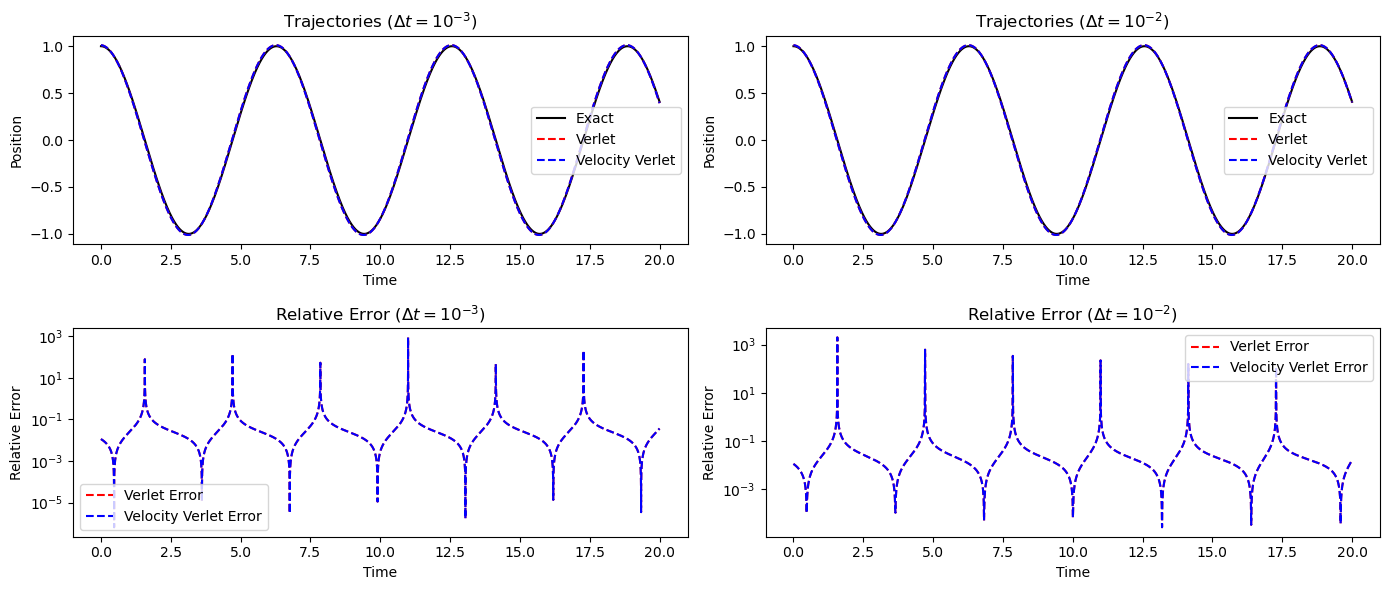

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
k = 1.0  # Spring constant
m = 1.0  # Mass
dt1 = 1e-3
dt2 = 1e-2
T = 20
n_steps1 = int(T / dt1)
n_steps2 = int(T / dt2)

# Exact solution for comparison
def exact_solution(t):
    return np.cos(np.sqrt(k/m) * t)

# Velocity Verlet Algorithm
def velocity_verlet(x0, v0, dt, n_steps):
    x = np.zeros(n_steps)
    v = np.zeros(n_steps)
    a = np.zeros(n_steps)
    
    x[0] = x0
    v[0] = v0
    a[0] = -k/m * x0
    
    for i in range(n_steps - 1):
        x[i+1] = x[i] + v[i] * dt + 0.5 * a[i] * dt**2
        a_next = -k/m * x[i+1]
        v[i+1] = v[i] + 0.5 * (a[i] + a_next) * dt
        a[i+1] = a_next
    
    return x, v

# Verlet Algorithm
def verlet(x0, v0, dt, n_steps):
    x = np.zeros(n_steps)
    v = np.zeros(n_steps)  # Initialize with the same size, we'll update it later
    
    x[0] = x0
    x[1] = x0 + v0 * dt - 0.5 * k/m * x0 * dt**2  # Use initial velocity to compute x[1]
    
    for i in range(1, n_steps - 1):
        x[i+1] = 2 * x[i] - x[i-1] - k/m * x[i] * dt**2
    
    # Velocity can only be computed from the second to the second-to-last point
    v[1:-1] = (x[2:] - x[:-2]) / (2 * dt)
    
    return x, v

# Initial conditions with a small perturbation
x0 = 1.0 + np.random.normal(0, 0.01)  # Adding small noise to initial position
v0 = 0.0 + np.random.normal(0, 0.01)  # Adding small noise to initial velocity

# Run simulations
x_verlet1, v_verlet1 = verlet(x0, v0, dt1, n_steps1)
x_velocity_verlet1, v_velocity_verlet1 = velocity_verlet(x0, v0, dt1, n_steps1)

x_verlet2, v_verlet2 = verlet(x0, v0, dt2, n_steps2)
x_velocity_verlet2, v_velocity_verlet2 = velocity_verlet(x0, v0, dt2, n_steps2)

# Time arrays
t1 = np.linspace(0, T, n_steps1)
t2 = np.linspace(0, T, n_steps2)

# Exact solution
x_exact1 = exact_solution(t1)
x_exact2 = exact_solution(t2)

# Plot results
plt.figure(figsize=(14, 6))

# dt = 10^-3
plt.subplot(2, 2, 1)
plt.plot(t1, x_exact1, 'k-', label='Exact')
plt.plot(t1, x_verlet1, 'r--', label='Verlet')
plt.plot(t1, x_velocity_verlet1, 'b--', label='Velocity Verlet')
plt.title(r'Trajectories ($\Delta t = 10^{-3}$)')
plt.xlabel('Time')
plt.ylabel('Position')
plt.legend()

# dt = 10^-2
plt.subplot(2, 2, 2)
plt.plot(t2, x_exact2, 'k-', label='Exact')
plt.plot(t2, x_verlet2, 'r--', label='Verlet')
plt.plot(t2, x_velocity_verlet2, 'b--', label='Velocity Verlet')
plt.title(r'Trajectories ($\Delta t = 10^{-2}$)')
plt.xlabel('Time')
plt.ylabel('Position')
plt.legend()

# Relative errors for dt = 10^-3
error_verlet1 = np.abs((x_verlet1 - x_exact1) / x_exact1)
error_velocity_verlet1 = np.abs((x_velocity_verlet1 - x_exact1) / x_exact1)

plt.subplot(2, 2, 3)
plt.plot(t1, error_verlet1, 'r--', label='Verlet Error')
plt.plot(t1, error_velocity_verlet1, 'b--', label='Velocity Verlet Error')
plt.yscale('log')
plt.title(r'Relative Error ($\Delta t = 10^{-3}$)')
plt.xlabel('Time')
plt.ylabel('Relative Error')
plt.legend()

# Relative errors for dt = 10^-2
error_verlet2 = np.abs((x_verlet2 - x_exact2) / x_exact2)
error_velocity_verlet2 = np.abs((x_velocity_verlet2 - x_exact2) / x_exact2)

plt.subplot(2, 2, 4)
plt.plot(t2, error_verlet2, 'r--', label='Verlet Error')
plt.plot(t2, error_velocity_verlet2, 'b--', label='Velocity Verlet Error')
plt.yscale('log')
plt.title(r'Relative Error ($\Delta t = 10^{-2}$)')
plt.xlabel('Time')
plt.ylabel('Relative Error')
plt.legend()

plt.tight_layout()
plt.show()


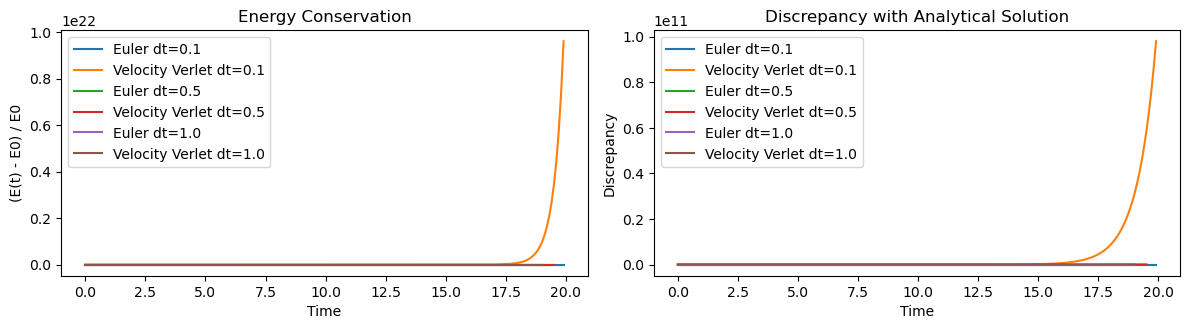

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
omega = np.sqrt(2)  # Angular frequency for the harmonic oscillator

# Analytical solutions
def analytical_q(t, A, phi):
    return A * np.cos(omega * t + phi)

def analytical_p(t, A, phi):
    return -A * omega * np.sin(omega * t + phi)

# Initialize parameters
A = 1.0  # Amplitude
phi = 0.0  # Phase
q0 = A * np.cos(phi)
p0 = -A * omega * np.sin(phi)
E0 = 0.5 * p0**2 + 0.5 * q0**2  # Initial energy

# Time parameters
t_max = 20.0
dt_values = [0.1, 0.5, 1.0]  # Time steps to test

# Initialize plots
plt.figure(figsize=(12, 6))

for dt in dt_values:
    # Time array
    t = np.arange(0, t_max, dt)
    num_steps = len(t)
    
    # Euler Method
    q_euler = np.zeros(num_steps)
    p_euler = np.zeros(num_steps)
    q_euler[0] = q0
    p_euler[0] = p0

    for i in range(1, num_steps):
        q_euler[i] = q_euler[i-1] + p_euler[i-1] * dt
        p_euler[i] = p_euler[i-1] - 2 * q_euler[i-1] * dt

    E_euler = 0.5 * p_euler**2 + 0.5 * q_euler**2
    energy_conservation_euler = (E_euler - E0) / E0
    discrepancy_euler = np.sqrt((q_euler - analytical_q(t, A, phi))**2 + (p_euler - analytical_p(t, A, phi))**2)

    # Velocity Verlet Method
    q_vv = np.zeros(num_steps)
    p_vv = np.zeros(num_steps)
    q_vv[0] = q0
    p_vv[0] = p0

    for i in range(1, num_steps):
        q_vv[i] = q_vv[i-1] + p_vv[i-1] * dt + 0.5 * (-2 * q_vv[i-1]) * dt**2
        p_vv[i] = p_vv[i-1] - (-2 * q_vv[i-1]) * dt

    E_vv = 0.5 * p_vv**2 + 0.5 * q_vv**2
    energy_conservation_vv = (E_vv - E0) / E0
    discrepancy_vv = np.sqrt((q_vv - analytical_q(t, A, phi))**2 + (p_vv - analytical_p(t, A, phi))**2)

    # Plot energy conservation
    plt.subplot(2, 2, 1)
    plt.plot(t, energy_conservation_euler, label=f'Euler dt={dt}')
    plt.plot(t, energy_conservation_vv, label=f'Velocity Verlet dt={dt}')
    plt.xlabel('Time')
    plt.ylabel('(E(t) - E0) / E0')
    plt.title('Energy Conservation')
    plt.legend()

    # Plot discrepancy
    plt.subplot(2, 2, 2)
    plt.plot(t, discrepancy_euler, label=f'Euler dt={dt}')
    plt.plot(t, discrepancy_vv, label=f'Velocity Verlet dt={dt}')
    plt.xlabel('Time')
    plt.ylabel('Discrepancy')
    plt.title('Discrepancy with Analytical Solution')
    plt.legend()

# Display plots
plt.tight_layout()
plt.show()


Stable


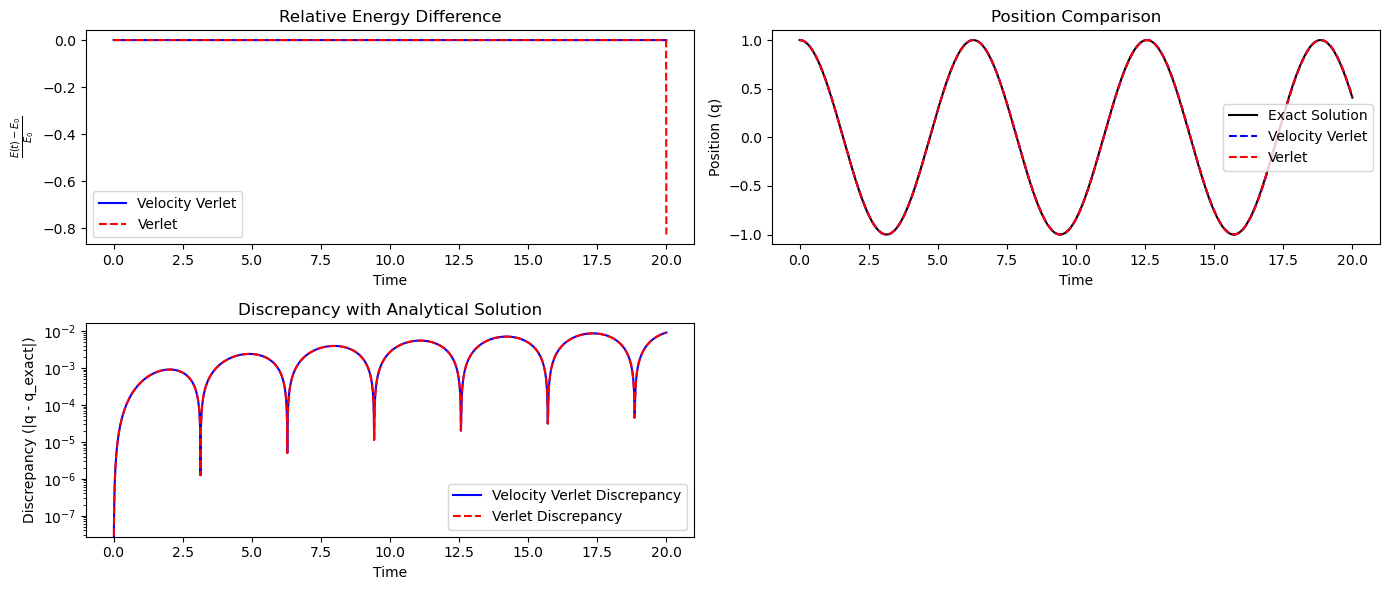

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
omega = 1  # Angular frequency
dt = 0.01  # Time step
T = 20.0  # Total time
n_steps = int(T / dt)

# Initial conditions
q0 = 1.0  # Initial position
p0 = 0.0  # Initial momentum

# Exact solution for comparison
def exact_solution(t):
    return q0 * np.cos(omega * t), p0 * np.cos(omega * t) - q0 * omega * np.sin(omega * t)

# Corrected Velocity Verlet Algorithm
def velocity_verlet(q0, p0, dt, n_steps):
    q = np.zeros(n_steps)
    p = np.zeros(n_steps)
    E = np.zeros(n_steps)
    
    q[0] = q0
    p[0] = p0
    
    for i in range(n_steps - 1):
        p_half = p[i] - 0.5 * omega**2 * q[i] * dt  # Half-step momentum
        q[i + 1] = q[i] + p_half * dt               # Full step position
        p[i + 1] = p_half - 0.5 * omega**2 * q[i + 1] * dt  # Full step momentum
        E[i] = 0.5 * (p[i]**2 + omega**2 * q[i]**2)  # Calculate energy

    E[-1] = 0.5 * (p[-1]**2 + omega**2 * q[-1]**2)  # Final energy
    return q, p, E

# Verlet Algorithm
def verlet(q0, p0, dt, n_steps):
    q = np.zeros(n_steps)
    p = np.zeros(n_steps)
    E = np.zeros(n_steps)
    
    q[0] = q0
    p[0] = p0
    q[1] = q0 + p0 * dt - 0.5 * omega**2 * q0 * dt**2  # Initial position using the first step

    for i in range(1, n_steps - 1):
        q[i + 1] = 2 * q[i] - q[i - 1] - omega**2 * q[i] * dt**2  # Update position

    # Velocity calculation using central difference
    p[1:-1] = (q[2:] - q[:-2]) / (2 * dt)
    
    for i in range(n_steps):
        E[i] = 0.5 * (p[i]**2 + omega**2 * q[i]**2)  # Calculate energy

    return q, p, E

# Run simulations
q_velocity_verlet, p_velocity_verlet, E_velocity_verlet = velocity_verlet(q0, p0, dt, n_steps)
q_verlet, p_verlet, E_verlet = verlet(q0, p0, dt, n_steps)

# Time array for plotting
t = np.linspace(0, T, n_steps)

# Exact solution for comparison
q_exact, p_exact = exact_solution(t)

# Calculate relative energy difference
E0 = E_velocity_verlet[0]  # Initial energy
relative_energy_difference_velocity_verlet = (E_velocity_verlet - E0) / E0
relative_energy_difference_verlet = (E_verlet - E0) / E0

# Plot results
plt.figure(figsize=(14, 6))

# Energy conservation
plt.subplot(2, 2, 1)
plt.plot(t, relative_energy_difference_velocity_verlet, 'b-', label='Velocity Verlet')
plt.plot(t, relative_energy_difference_verlet, 'r--', label='Verlet')
plt.title('Relative Energy Difference')
plt.xlabel('Time')
plt.ylabel(r'$\frac{E(t) - E_0}{E_0}$')
#plt.yscale('log')
plt.legend()

# Position comparison
plt.subplot(2, 2, 2)
plt.plot(t, q_exact, 'k-', label='Exact Solution')
plt.plot(t, q_velocity_verlet, 'b--', label='Velocity Verlet')
plt.plot(t, q_verlet, 'r--', label='Verlet')
plt.title('Position Comparison')
plt.xlabel('Time')
plt.ylabel('Position (q)')
plt.legend()

# Discrepancy with analytical solution
discrepancy_velocity_verlet = np.abs(q_velocity_verlet - q_exact)
discrepancy_verlet = np.abs(q_verlet - q_exact)

plt.subplot(2, 2, 3)
plt.plot(t, discrepancy_velocity_verlet, 'b-', label='Velocity Verlet Discrepancy')
plt.plot(t, discrepancy_verlet, 'r--', label='Verlet Discrepancy')
plt.title('Discrepancy with Analytical Solution')
plt.xlabel('Time')
plt.ylabel('Discrepancy (|q - q_exact|)')
plt.yscale('log')
plt.legend()

# Verify stability for omega * dt < 2
stable = omega * dt < 2
stability_message = 'Stable' if stable else 'Not Stable'
print(stability_message)


plt.tight_layout()
plt.show()


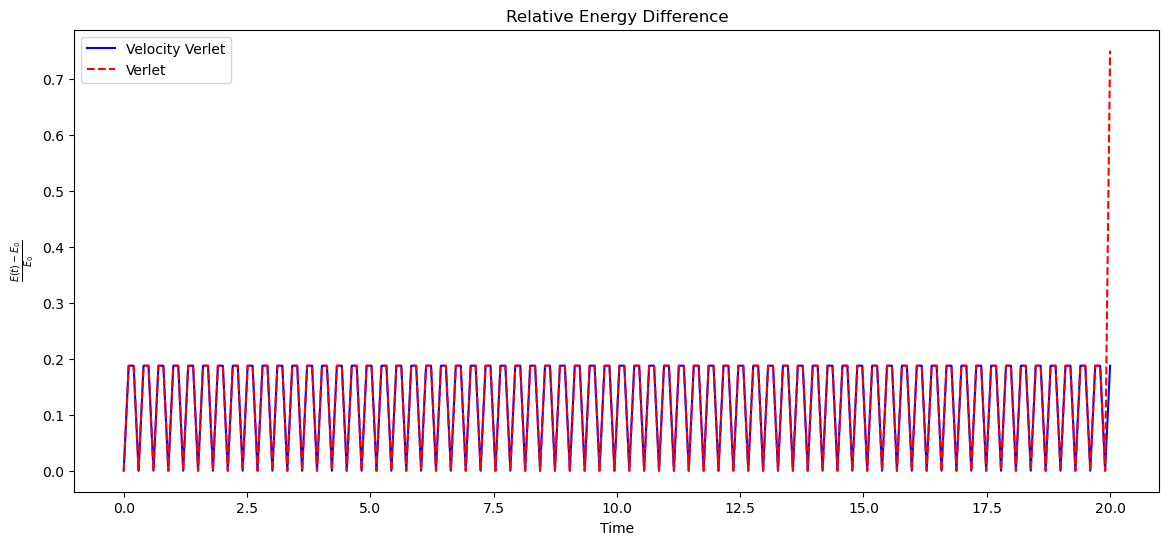

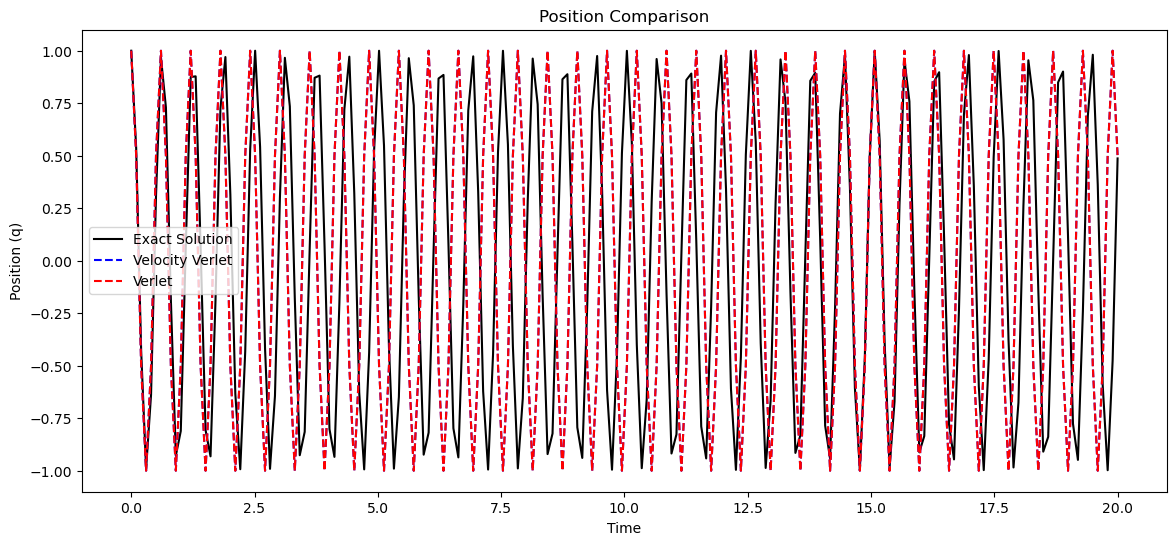

Stable


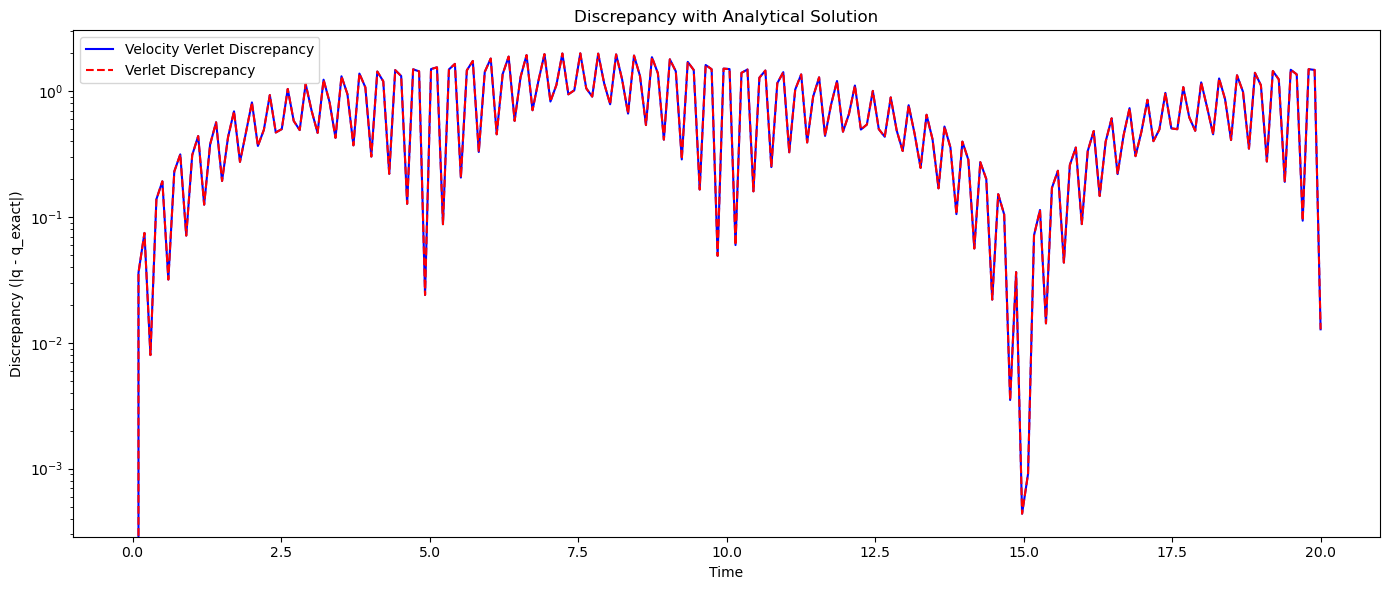

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
omega = 10  # Angular frequency
dt = 0.1 # Time step
T = 20  # Total time
n_steps = int(T / dt)

# Initial conditions
q0 = 1.0  # Initial position
p0 = 0.0  # Initial momentum

# Exact solution for comparison
def exact_solution(t):
    return q0 * np.cos(omega * t), p0 * np.cos(omega * t) - q0 * omega * np.sin(omega * t)

# Corrected Velocity Verlet Algorithm
def velocity_verlet(q0, p0, dt, n_steps):
    q = np.zeros(n_steps)
    p = np.zeros(n_steps)
    E = np.zeros(n_steps)
    
    q[0] = q0
    p[0] = p0
    E[0] = 0.5 * (p[0]**2 + omega**2 * q[0]**2)  # Initial energy
    
    for i in range(n_steps - 1):
        p_half = p[i] - 0.5 * omega**2 * q[i] * dt  # Half-step momentum
        q[i + 1] = q[i] + p_half * dt               # Full step position
        p[i + 1] = p_half - 0.5 * omega**2 * q[i + 1] * dt  # Full step momentum
        
        E[i + 1] = 0.5 * (p[i + 1]**2 + omega**2 * q[i + 1]**2)  # Energy at each time step
        
    return q, p, E

# Verlet Algorithm (Position Verlet)
def verlet(q0, p0, dt, n_steps):
    q = np.zeros(n_steps)
    p = np.zeros(n_steps)
    E = np.zeros(n_steps)
    
    q[0] = q0
    p[0] = p0
    E[0] = 0.5 * (p[0]**2 + omega**2 * q[0]**2)  # Initial energy
    
    # First step position calculation
    q[1] = q0 + p0 * dt - 0.5 * omega**2 * q0 * dt**2
    
    for i in range(1, n_steps - 1):
        q[i + 1] = 2 * q[i] - q[i - 1] - omega**2 * q[i] * dt**2  # Update position
    
    # Velocity calculation using central difference
    p[1:-1] = (q[2:] - q[:-2]) / (2 * dt)
    
    for i in range(1, n_steps):
        E[i] = 0.5 * (p[i]**2 + omega**2 * q[i]**2)  # Energy at each time step

    return q, p, E

# Run simulations
q_velocity_verlet, p_velocity_verlet, E_velocity_verlet = velocity_verlet(q0, p0, dt, n_steps)
q_verlet, p_verlet, E_verlet = verlet(q0, p0, dt, n_steps)

# Time array for plotting
t = np.linspace(0, T, n_steps)

# Exact solution for comparison
q_exact, p_exact = exact_solution(t)

# Calculate relative energy difference
E0_velocity = E_velocity_verlet[0]  # Initial energy for velocity verlet
relative_energy_difference_velocity_verlet = abs(E_velocity_verlet - E0_velocity) / E0_velocity

E0_verlet = E_verlet[0]  # Initial energy for verlet
relative_energy_difference_verlet = abs(E_verlet - E0_verlet) / E0_verlet

# Plot results
plt.figure(figsize=(14, 6))

# Energy conservation

plt.plot(t, relative_energy_difference_velocity_verlet, 'b-', label='Velocity Verlet')
plt.plot(t, relative_energy_difference_verlet, 'r--', label='Verlet')
plt.title('Relative Energy Difference')
plt.xlabel('Time')
plt.ylabel(r'$\frac{E(t) - E_0}{E_0}$')
#plt.yscale('log')
plt.legend()
plt.show()
# Position comparison
plt.figure(figsize=(14, 6))
plt.plot(t, q_exact, 'k-', label='Exact Solution')
plt.plot(t, q_velocity_verlet, 'b--', label='Velocity Verlet')
plt.plot(t, q_verlet, 'r--', label='Verlet')
plt.title('Position Comparison')
plt.xlabel('Time')
plt.ylabel('Position (q)')
plt.legend()
plt.show()
# Discrepancy with analytical solution
discrepancy_velocity_verlet = np.abs(q_velocity_verlet - q_exact)
discrepancy_verlet = np.abs(q_verlet - q_exact)
plt.figure(figsize=(14, 6))

plt.plot(t, discrepancy_velocity_verlet, 'b-', label='Velocity Verlet Discrepancy')
plt.plot(t, discrepancy_verlet, 'r--', label='Verlet Discrepancy')
plt.title('Discrepancy with Analytical Solution')
plt.xlabel('Time')
plt.ylabel('Discrepancy (|q - q_exact|)')
plt.yscale('log')
plt.legend()

# Verify stability for omega * dt < 2
stable = omega * dt < 2
stability_message = 'Stable' if stable else 'Not Stable'
print(stability_message)

plt.tight_layout()
plt.show()


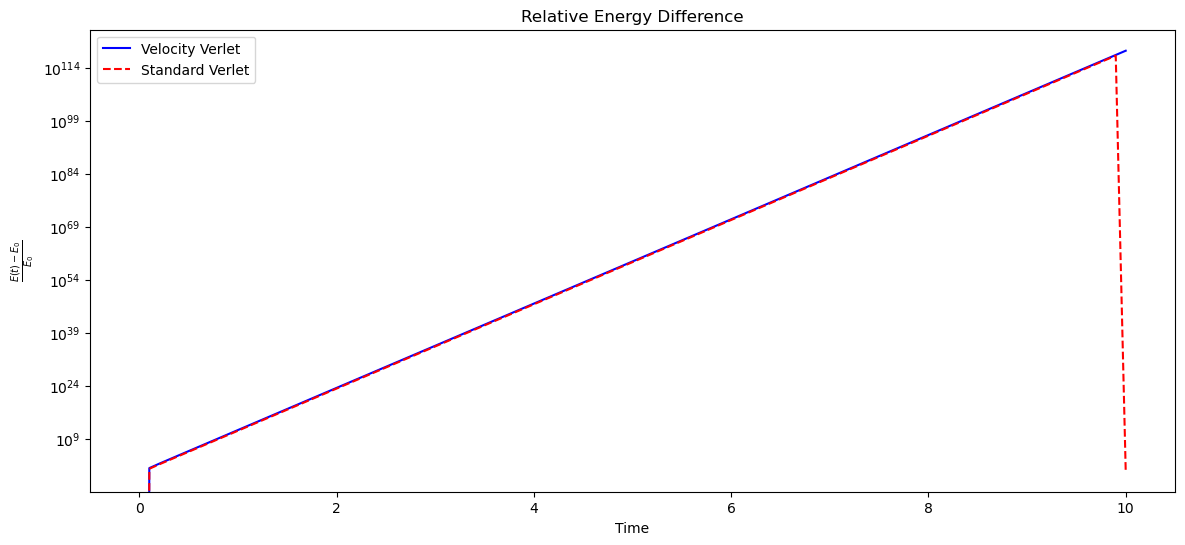

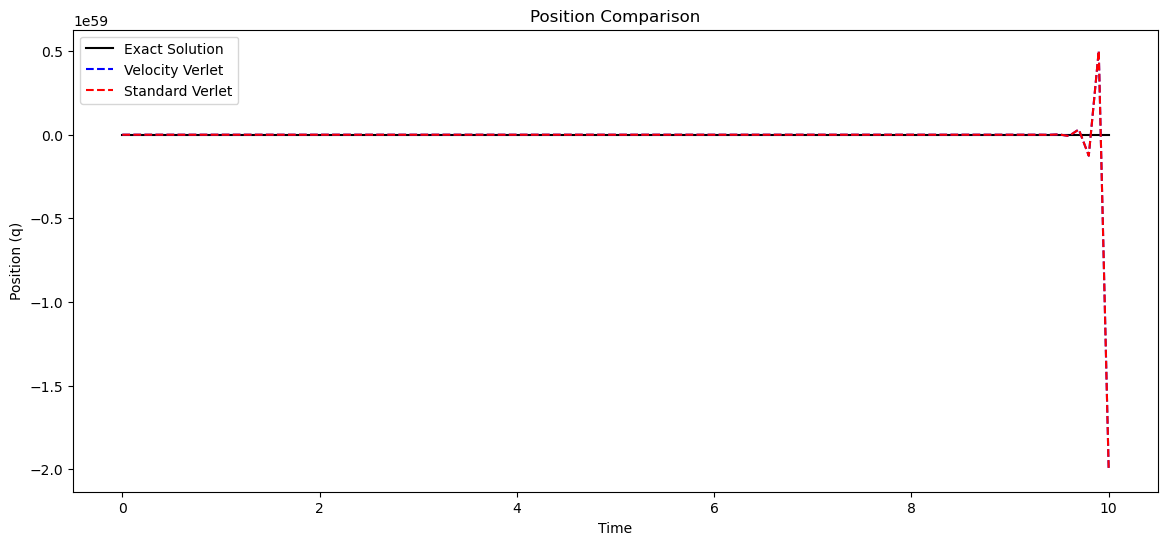

Not Stable


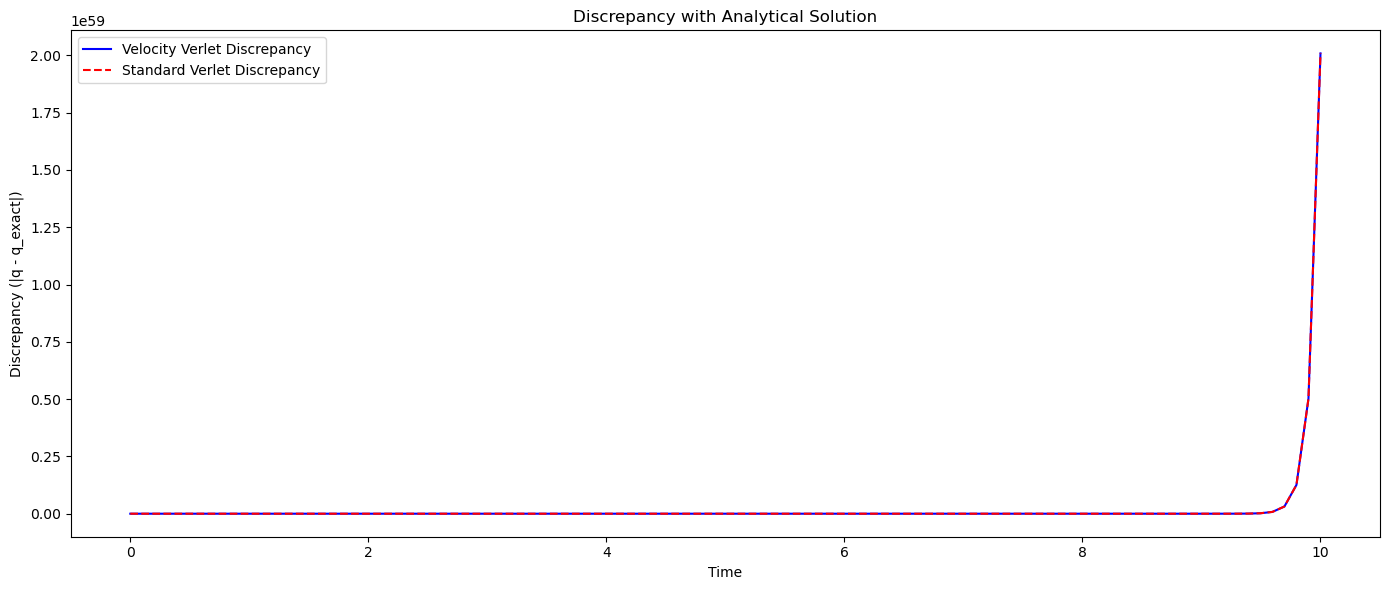

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
omega = 25 # Angular frequency
dt = 0.1  # Time step
T = 10 # Total time
n_steps = int(T / dt)

# Initial conditions
q0 = 1.0  # Initial position
p0 = 0  # Initial momentum

# Exact solution for comparison
def exact_solution(t):
    return q0 * np.cos(omega * t)+(p0/omega)*np.sin(omega*t), p0 * np.cos(omega * t) - q0 * omega * np.sin(omega * t)

# Corrected Velocity Verlet Algorithm
def velocity_verlet(q0, p0, dt, n_steps):
    q = np.zeros(n_steps)
    p = np.zeros(n_steps)
    E = np.zeros(n_steps)
    
    q[0] = q0
    p[0] = p0
    E[0] = 0.5 * (p[0]**2 + omega**2 * q[0]**2)  # Initial energy
    
    for i in range(n_steps - 1):
        p_half = p[i] - 0.5 * omega**2 * q[i] * dt  # Half-step momentum
        q[i + 1] = q[i] + p_half * dt               # Full step position
        p[i + 1] = p_half - 0.5 * omega**2 * q[i + 1] * dt  # Full step momentum
        
        E[i + 1] = 0.5 * (p[i + 1]**2 + omega**2 * q[i + 1]**2)  # Energy at each time step
        
    return q, p, E

# Standard Verlet Algorithm
def standard_verlet(q0, p0, dt, n_steps):
    q = np.zeros(n_steps)
    p = np.zeros(n_steps)
    E = np.zeros(n_steps)
    
    q[0] = q0
    p[0] = p0
    E[0] = 0.5 * (p[0]**2 + omega**2 * q[0]**2)  # Initial energy
    
    # First step position calculation
    q[1] = q0 + p0 * dt - 0.5 * omega**2 * q0 * dt**2
    
    for i in range(1, n_steps - 1):
        q[i + 1] = 2 * q[i] - q[i - 1] - omega**2 * q[i] * dt**2  # Update position
        E[i] = 0.5 * (p[i]**2 + omega**2 * q[i]**2)
    # Velocity calculation using central difference
    p[1:-1] = (q[2:] - q[:-2]) / (2 * dt)
    
  

    return q, p, E

# Run simulations
q_velocity_verlet, p_velocity_verlet, E_velocity_verlet = velocity_verlet(q0, p0, dt, n_steps)
q_standard_verlet, p_standard_verlet, E_standard_verlet = standard_verlet(q0, p0, dt, n_steps)

# Time array for plotting
t = np.linspace(0, T, n_steps)

# Exact solution for comparison
q_exact, p_exact = exact_solution(t)

# Calculate relative energy difference
E0_velocity = E_velocity_verlet[0]  # Initial energy for velocity verlet
relative_energy_difference_velocity_verlet = abs(E_velocity_verlet - E0_velocity) / E0_velocity

E0_standard = E_standard_verlet[0]  # Initial energy for standard verlet
relative_energy_difference_standard = abs(E_standard_verlet - E0_standard) / E0_standard

# Plot results
plt.figure(figsize=(14, 6))

# Energy conservation
plt.plot(t, relative_energy_difference_velocity_verlet, 'b-', label='Velocity Verlet')
plt.plot(t, relative_energy_difference_standard, 'r--', label='Standard Verlet')
plt.title('Relative Energy Difference')
plt.xlabel('Time')
plt.ylabel(r'$\frac{E(t) - E_0}{E_0}$')
plt.legend()
plt.yscale('log')
plt.show()

# Position comparison
plt.figure(figsize=(14, 6))
plt.plot(t, q_exact, 'k-', label='Exact Solution')
plt.plot(t, q_velocity_verlet, 'b--', label='Velocity Verlet')
plt.plot(t, q_standard_verlet, 'r--', label='Standard Verlet')
plt.title('Position Comparison')
plt.xlabel('Time')
plt.ylabel('Position (q)')
plt.legend()
plt.show()

# Discrepancy with analytical solution
discrepancy_velocity_verlet = np.abs(q_velocity_verlet - q_exact)
discrepancy_standard_verlet = np.abs(q_standard_verlet - q_exact)


plt.figure(figsize=(14, 6))
plt.plot(t, discrepancy_velocity_verlet, 'b-', label='Velocity Verlet Discrepancy')
plt.plot(t, discrepancy_standard_verlet, 'r--', label='Standard Verlet Discrepancy')
plt.title('Discrepancy with Analytical Solution')
plt.xlabel('Time')
plt.ylabel('Discrepancy (|q - q_exact|)')
#plt.yscale('log')
#plt.ylim(0.125,0.2)
plt.legend()

# Verify stability for omega * dt < 2
stable = omega * dt < 2
stability_message = 'Stable' if stable else 'Not Stable'
print(stability_message)

plt.tight_layout()
plt.show()


Not Stable


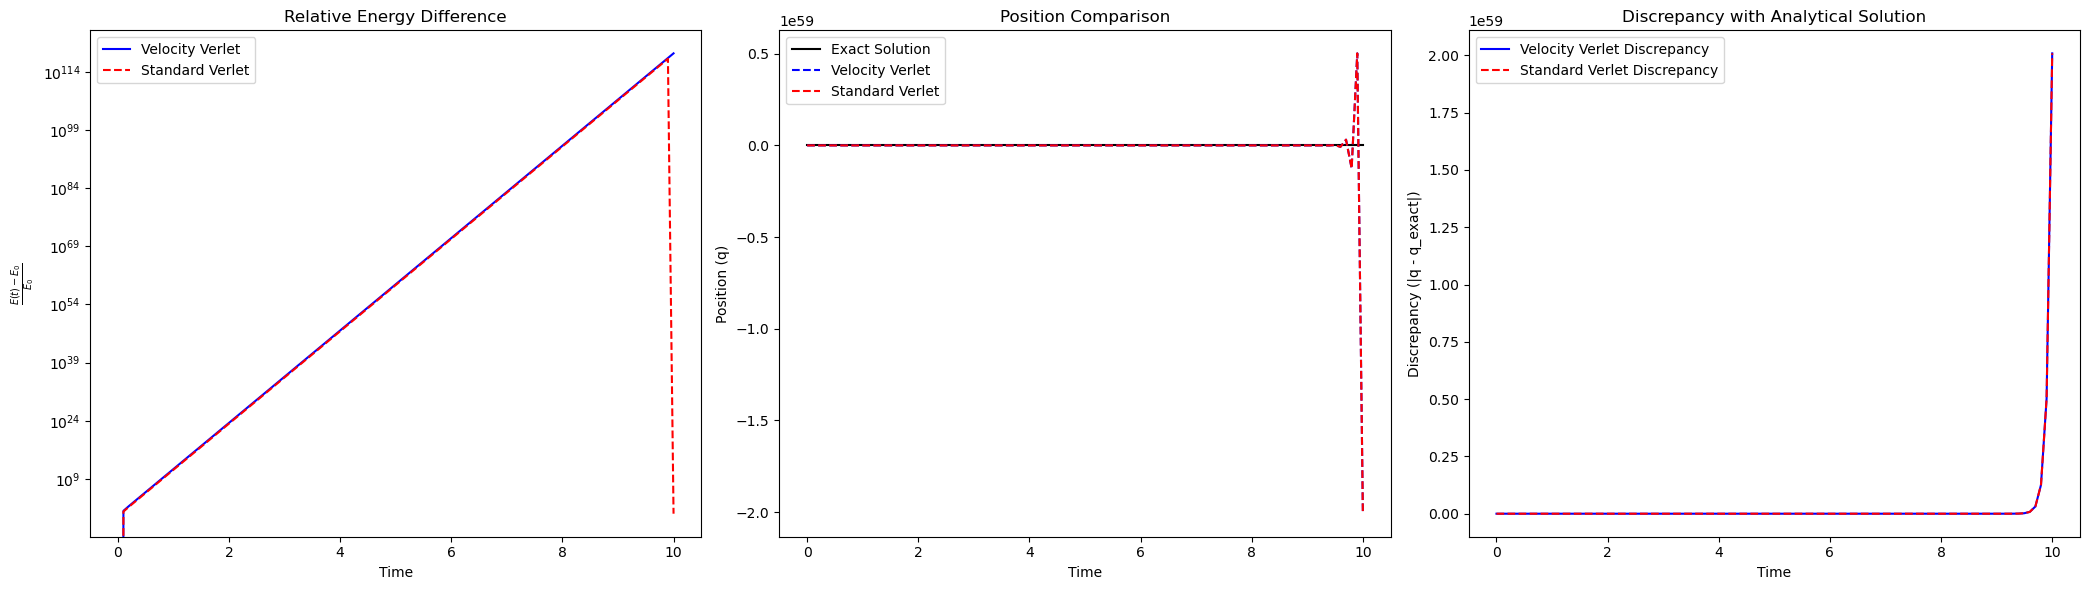

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Create a 1x3 grid for the plots
fig, axs = plt.subplots(1, 3, figsize=(21, 6))  # 1 row, 3 columns

# Energy conservation plot
axs[0].plot(t, relative_energy_difference_velocity_verlet, 'b-', label='Velocity Verlet')
axs[0].plot(t, relative_energy_difference_standard, 'r--', label='Standard Verlet')
axs[0].set_title('Relative Energy Difference')
axs[0].set_xlabel('Time')
axs[0].set_ylabel(r'$\frac{E(t) - E_0}{E_0}$')
axs[0].legend()
axs[0].set_yscale('log')

# Position comparison plot
axs[1].plot(t, q_exact, 'k-', label='Exact Solution')
axs[1].plot(t, q_velocity_verlet, 'b--', label='Velocity Verlet')
axs[1].plot(t, q_standard_verlet, 'r--', label='Standard Verlet')
axs[1].set_title('Position Comparison')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Position (q)')
axs[1].legend()

# Discrepancy with analytical solution plot
discrepancy_velocity_verlet = np.abs(q_velocity_verlet - q_exact)
discrepancy_standard_verlet = np.abs(q_standard_verlet - q_exact)

axs[2].plot(t, discrepancy_velocity_verlet, 'b-', label='Velocity Verlet Discrepancy')
axs[2].plot(t, discrepancy_standard_verlet, 'r--', label='Standard Verlet Discrepancy')
axs[2].set_title('Discrepancy with Analytical Solution')
axs[2].set_xlabel('Time')
axs[2].set_ylabel('Discrepancy (|q - q_exact|)')
#axs[2].set_yscale('log')
axs[2].legend()

# Verify stability for omega * dt < 2
stable = omega * dt < 2
stability_message = 'Stable' if stable else 'Not Stable'
print(stability_message)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


In [11]:
# Discrepancy with analytical solution
discrepancy_velocity_verlet = np.abs(q_velocity_verlet - q_exact)
discrepancy_standard_verlet = np.abs(q_standard_verlet - q_exact)


print(q_velocity_verlet-q_standard_verlet)

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -1.11022302e-16 -1.11022302e-16 -1.11022302e-16
 -1.11022302e-16 -1.11022302e-16 -2.22044605e-16 -3.33066907e-16
 -4.44089210e-16 -4.99600361e-16 -5.55111512e-16 -6.10622664e-16
 -6.59194921e-16 -7.21644966e-16 -7.49400542e-16 -7.77156117e-16
 -8.32667268e-16 -8.88178420e-16 -9.99200722e-16 -1.11022302e-15
 -1.22124533e-15 -1.44328993e-15 -1.66533454e-15 -1.77635684e-15
 -1.88737914e-15 -1.99840144e-15 -2.10942375e-15 -2.22044605e-15
 -2.10942375e-15 -1.99840144e-15 -1.88737914e-15 -1.77635684e-15
 -1.66533454e-15 -1.44328993e-15 -1.33226763e-15 -1.22124533e-15
 -1.11022302e-15 -9.99200722e-16 -8.32667268e-16 -6.10622664e-16
 -3.88578059e-16 -1.38777878e-16  9.71445147e-17  3.31332184e-16
  5.82867088e-16  8.32667268e-16  1.05471187e-15  1.27675648e-15
  1.49880108e-15  1.66533454e-15  1.88737914e-15  1.99840144e-15
  2.10942375e-15  2.22044605e-15  2.22044605e-15  2.22044605e-15
  2.10942375e-15  1.99840